In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# import a lot of things from keras:
# sequential model
from keras.models import Sequential

# layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

# loss function
from keras.metrics import categorical_crossentropy

# callback functions
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# convert data to categorial vector representation
from keras.utils import to_categorical

from torchvision.datasets import EMNIST

In [ ]:
# Load the EMNIST dataset from pytorch

train_data = EMNIST(root="data", split="letters", train=True, download=True)
test_data = EMNIST(root="data", split="letters", train=False, download=True)

In [3]:
# Prepare the data
def preprocess_data(data):
    X = []
    y = []
    for img, label in data:
        # Convert to numpy array, fix orientation and normalize
        arr = np.array(img)
        arr = arr.T
        arr = arr / 255.
        X.append(arr)
        y.append(label)
    return X, y

X_train, y_train = preprocess_data(train_data)
X_train = np.array(X_train).astype("float32")
y_train = np.array(y_train)

X_test, y_test = preprocess_data(test_data)
X_test = np.array(X_test).astype("float32")
y_test = np.array(y_test)

In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(124800, 28, 28) (124800,)
(20800, 28, 28) (20800,)


In [5]:
# Add channel dimension for compatibility with CNN
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

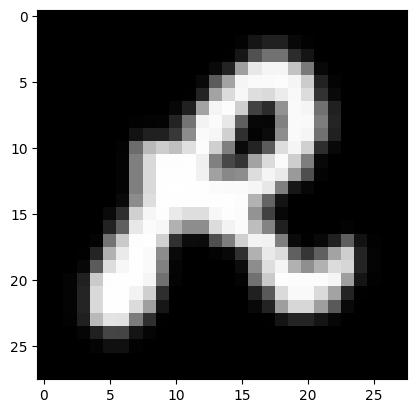

In [6]:
i = np.random.randint(len(X_train))
plt.imshow(X_train[i].squeeze(), cmap="gray")

In [7]:
# variables for hyperparameters
batch_size = 16
epochs = 30
num_classes = len(train_data.classes)
activation = 'relu'
activation_conv = 'leaky_relu'
num_neurons = 64

model = Sequential()

model.add(Conv2D(32, (5, 5), activation=activation_conv, padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model.add(Conv2D(32, (3, 3), activation=activation_conv, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(num_neurons, activation=activation))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=categorical_crossentropy, optimizer="adam", metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)
stop_early = EarlyStopping(monitor='val_loss', patience=3)

In [8]:
history = model.fit(
    X_train,
    y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, y_test_cat),
    callbacks=[reduce_lr, stop_early]
)

Epoch 1/30
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7514 - loss: 0.8080 - val_accuracy: 0.9191 - val_loss: 0.2489 - learning_rate: 0.0010
Epoch 2/30
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8954 - loss: 0.3153 - val_accuracy: 0.9197 - val_loss: 0.2373 - learning_rate: 0.0010
Epoch 3/30
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9106 - loss: 0.2672 - val_accuracy: 0.9226 - val_loss: 0.2293 - learning_rate: 0.0010
Epoch 4/30
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9178 - loss: 0.2420 - val_accuracy: 0.9295 - val_loss: 0.2101 - learning_rate: 0.0010
Epoch 5/30
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9203 - loss: 0.2358 - val_accuracy: 0.9352 - val_loss: 0.1958 - learning_rate: 0.0010
Epoch 6/30
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9255 - loss: 0.2186 - val_accuracy: 0.9348 - val_loss: 0.1915 - learning_rate: 0.0010
Epoch 7/30
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (16, 28, 28, 32)            │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (16, 10, 10, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (16, 10, 10, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (16, 5, 5, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (16, 5, 5, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (16, 5, 5, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (16, 800)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (16, 64)                    │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (16, 27)                    │           1,755 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 189,555 (740.45 KB)

 Trainable params: 63,163 (246.73 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 126,328 (493.47 KB)

In [10]:
model.save(f"letter_recognition.keras")